In [2]:
import pandas as pd
import plotly.express as px
import dash
from dash import html, dcc

In [3]:
cmp_df=pd.read_csv(r"C:\Users\Emily Maduike\Documents\analysis stuff\excel\companies.csv")
cmp_df.columns

# filtering relevant columns
cmp_df=cmp_df[['normalized_name','category_code','status','funding_total_usd','country_code', 
               'state_code','city','region','funding_rounds','founded_at']]

# displaying the dataset
cmp_df.head()

,normalized_name,category_code,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17
1,flektor,games_video,acquired,NaN,USA,CA,Culver City,Los Angeles,NaN,NaN
2,there,games_video,acquired,NaN,USA,CA,San Mateo,SF Bay,NaN,NaN
3,mywebbo,network_hosting,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26
4,the movie streamer,games_video,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26


In [4]:
# checking the size of the dataframe
cmp_df.shape #the size of the datframe is (196553, 11)
print(f'the size before dropping dupicates is, {cmp_df.shape}')

#checking for duplicates
cmp_df.duplicated().sum()

#removing duplicates
cmp_df.drop_duplicates(inplace=True)

#checking again for duplicates
cmp_df.duplicated().sum()

#new size of dataframe
print(f'the size after dropping duplicates is, {cmp_df.shape}')


the size before dropping dupicates is, (196553, 10)
the size after dropping duplicates is, (196313, 10)


In [5]:
cmp_df.info()

# changing the 'founded_at' column to datetime object
cmp_df['founded_at']=pd.to_datetime(cmp_df['founded_at'])

# displaying the datatypes of columns
cmp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196313 entries, 0 to 196552
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   normalized_name    196297 non-null  object 
 1   category_code      123166 non-null  object 
 2   status             196313 non-null  object 
 3   funding_total_usd  27874 non-null   float64
 4   country_code       87984 non-null   object 
 5   state_code         50899 non-null   object 
 6   city               83884 non-null   object 
 7   region             196313 non-null  object 
 8   funding_rounds     31707 non-null   float64
 9   founded_at         91218 non-null   object 
dtypes: float64(2), object(8)
memory usage: 16.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 196313 entries, 0 to 196552
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   normalized_name    196297 non-

In [6]:
#rename 'category_code' column
cmp_df.rename(columns={'category_code':'sector'}, inplace=True)

# adding the year column
cmp_df['year'] = cmp_df['founded_at'].dt.year
cmp_df['year'] = cmp_df['year'].astype('Int64')
cmp_df.head()

,normalized_name,sector,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at,year
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17,2005
1,flektor,games_video,acquired,NaN,USA,CA,Culver City,Los Angeles,NaN,NaT,<NA>
2,there,games_video,acquired,NaN,USA,CA,San Mateo,SF Bay,NaN,NaT,<NA>
3,mywebbo,network_hosting,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26,2008
4,the movie streamer,games_video,operating,NaN,NaN,NaN,NaN,unknown,NaN,2008-07-26,2008


38.02511561397546


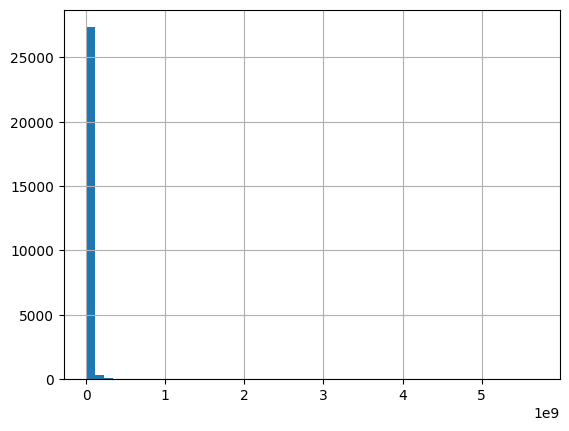

In [7]:
# checking for skewness to determine how to handle missing values
cmp_df['funding_total_usd'].hist(bins=50)
print(cmp_df['funding_total_usd'].skew())

In [8]:
# filling the null 'funding_total_usd' values with the median funding value per setor
cmp_df['funding_total_usd']=cmp_df.groupby('sector')['funding_total_usd'].transform(lambda x: x.fillna(x.median()))    

# filling string/categorical columns with "Unknown"
cmp_df[cmp_df.select_dtypes(include='object').columns]= cmp_df.select_dtypes(include='object').fillna('Unknown')
cmp_df['funding_total_usd'].isnull().sum()

np.int64(73147)

In [9]:
cmp_df['funding_range']=pd.cut(cmp_df['funding_total_usd'],
                               bins = [0, 1e5, 5e5, 1e6, 5e6, 10e6, 50e6, 100e6, 500e6, cmp_df['funding_total_usd'].max()],
                               labels = ['Less than 100K','100K - 500K','500K - 1M',
                                        '1M - 5M',
                                        '5M - 10M',
                                        '10M - 50M',
                                        '50M - 100M',
                                        '100M - 500M',
                                        '500M+'],right=False)
cmp_df.head(30)

,normalized_name,sector,status,funding_total_usd,country_code,state_code,city,region,funding_rounds,founded_at,year,funding_range
0,wetpaint,web,operating,39750000.0,USA,WA,Seattle,Seattle,3.0,2005-10-17,2005,10M - 50M
1,flektor,games_video,acquired,1960000.0,USA,CA,Culver City,Los Angeles,NaN,NaT,<NA>,1M - 5M
2,there,games_video,acquired,1960000.0,USA,CA,San Mateo,SF Bay,NaN,NaT,<NA>,1M - 5M
3,mywebbo,network_hosting,operating,6250000.0,Unknown,Unknown,Unknown,unknown,NaN,2008-07-26,2008,5M - 10M
4,the movie streamer,games_video,operating,1960000.0,Unknown,Unknown,Unknown,unknown,NaN,2008-07-26,2008,1M - 5M
5,synergie media,advertising,operating,3000000.0,MAR,Unknown,Agadir,Agadir,NaN,2007-06-27,2007,1M - 5M
6,green basti ecosystems,cleantech,operating,9000000.0,IND,Unknown,Vadodara,Vadodara,NaN,2008-08-20,2008,5M - 10M
7,hostnine,Unknown,operating,NaN,Unknown,Unknown,Unknown,unknown,NaN,NaT,<NA>,NaN
8,thomas publishing,advertising,operating,3000000.0,USA,NY,New York,New York,NaN,NaT,<NA>,1M - 5M
9,vetter idea management system,enterprise,operating,4332500.0,Unknown,Unknown,Unknown,unknown,NaN,2011-08-01,2011,1M - 5M


In [10]:
# extracting the no. of unique sectors 
print('the no. of unique sectors are:\n ',len(cmp_df['sector'].unique()))

# checking max no. of funding rounds
print('the highest no. of funding rounds is:\n',cmp_df['funding_rounds'].max()) #15

# checking for the most recent year
print('the most recent year is:\n', cmp_df['year'].max()) #2014

# checking for the oldest year
print('the oldest year is:\n',cmp_df['year'].min()) #1901

# extracting the unique years 
print('the unique years are:\n',cmp_df['year'].unique())

# extracting the unique status categories
print('the unique status categories are:\n',cmp_df['status'].unique())

the no. of unique sectors are:
  43
the highest no. of funding rounds is:
 15.0
the most recent year is:
 2014
the oldest year is:
 1901
the unique years are:
 <IntegerArray>
[2005, <NA>, 2008, 2007, 2011, 2003, 2009, 2006, 2012, 2010,
 ...
 2014, 1929, 1916, 1925, 1939, 1911, 1944, 1909, 1914, 1905]
Length: 115, dtype: Int64
the unique status categories are:
 ['operating' 'acquired' 'closed' 'ipo']


In [11]:
# grouping by'sector' and finding the sum of 'funding_total_usd', then extracting the top 5 sectors
sector_trends=cmp_df.groupby('sector')['funding_total_usd'].sum().nlargest(10)

# passing the object into a dataframe
sector_trends=pd.DataFrame(sector_trends)

# displaying the dataframe
sector_trends


,funding_total_usd
sector,
software,7.601517e+10
biotech,7.522878e+10
cleantech,4.724719e+10
mobile,3.870642e+10
enterprise,3.436552e+10
web,3.169983e+10
ecommerce,2.757100e+10
advertising,2.753319e+10
games_video,2.717504e+10


In [12]:
app= dash.Dash(__name__)


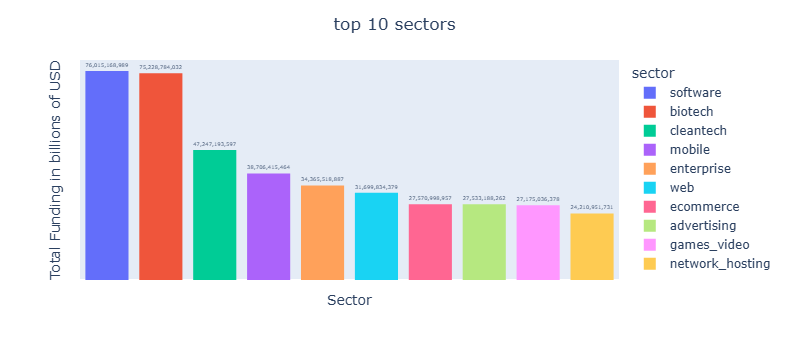

In [49]:
sector_trends= sector_trends.reset_index()

fig= px.bar(
    sector_trends,
    x="sector",
    y="funding_total_usd",
    color= "sector",
    text="funding_total_usd"
)

fig.update_traces(
    texttemplate= "%{text:,.0f}",
    textposition='outside',
    marker=dict(line=dict(width=0))
)

fig.update_yaxes(showticklabels=False, showgrid=False,title= "Total Funding in billions of USD")
fig.update_xaxes(showticklabels= False, showgrid= False, title="Sector")

fig.update_layout(
    title= 'top 10 sectors',
    title_x=0.5
)
fig.show()
    

In [14]:
# passing the top 10 sectors into a list to filter the dataframe
top=['software', 'biotech', 'cleantech', 'mobile', 'enterprise', 'web', 'ecommerce', 'advertising', 'games_video', 'network_hosting']

# copying the original dataset to filter rows by sector
cmp_df_copy=cmp_df.copy()

# filtering the dataframe
cmp_df_copy=cmp_df_copy.query('sector == @top & year >= 2009 & year < 2014')

# grouping by year and sector to find the sum of 'total_funding_usd'
top_sectors=cmp_df_copy.groupby(['year','sector']).agg(
    funding_total_usd=('funding_total_usd','sum'),
    funding_rounds=('funding_rounds','count'))

# passing the data into a dataframe and restting the index
top_sectors=pd.DataFrame(top_sectors).reset_index()
top_sectors

,year,sector,funding_total_usd,funding_rounds
0,2009,advertising,2.191680e+09,141
1,2009,biotech,2.209293e+09,153
2,2009,cleantech,1.803339e+09,72
3,2009,ecommerce,2.229478e+09,136
4,2009,enterprise,2.837163e+09,164
5,2009,games_video,1.656082e+09,121
6,2009,mobile,2.016305e+09,145
7,2009,network_hosting,9.892548e+08,19
8,2009,software,4.290506e+09,329
9,2009,web,2.591994e+09,254


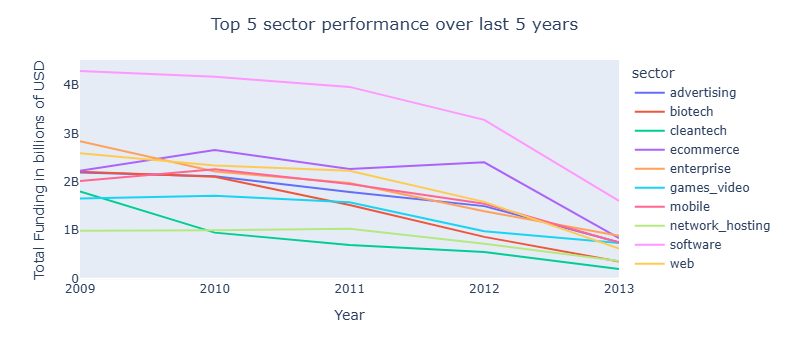

In [47]:

fig2= px.line(
    top_sectors,
    x="year",
    y="funding_total_usd",
    color= "sector"
)

fig2.update_yaxes(showticklabels=True, showgrid=False,title= "Total Funding in billions of USD")
fig2.update_xaxes(showticklabels= True, showgrid= False, title="Year")

fig2.update_layout(
    title= 'Top 5 sector performance over last 5 years',
    title_x=0.5
)
fig2.show()

In [22]:
# grouping by sector to calculate the average 'funding_total_usd'
by_sector = cmp_df.groupby(['sector']).agg(
    funding_total=('funding_total_usd','sum'),
    no_of_startups=('normalized_name','nunique'),
    funding_rounds_count=('funding_rounds', 'count')
)

# getting the top 5 sectors with highest avg funding
by_sector=pd.DataFrame(by_sector)
by_sector['funding_per_round']= by_sector['funding_total']/by_sector['funding_rounds_count']

# passing into a dataframe
by_sector['funding_per_round_per_startup']= by_sector['funding_total']/ (by_sector['no_of_startups']*by_sector['funding_rounds_count'])
by_sector['funding_per_round_per_startup']=by_sector['funding_per_round_per_startup'].round(0)
# resetting the index
by_sector=by_sector.reset_index()
by_sector_5=by_sector.nlargest(10,'funding_per_round')
by_startup_5=by_sector.nlargest(10,'funding_per_round_per_startup')

by_sector_5
# by_startup_5

,sector,funding_total,no_of_startups,funding_rounds_count,funding_per_round,funding_per_round_per_startup
3,automotive,4.207320e+09,291,87,4.836000e+07,166186.0
26,network_hosting,2.421095e+10,2349,517,4.682969e+07,19936.0
5,cleantech,4.724719e+10,1936,1069,4.419756e+07,22829.0
32,public_relations,1.732627e+10,2845,394,4.397529e+07,15457.0
25,nanotech,2.272790e+09,70,59,3.852187e+07,550312.0
29,other,2.301673e+10,13609,644,3.574027e+07,2626.0
6,consulting,1.162632e+10,5003,340,3.419506e+07,6835.0
36,semiconductor,1.456961e+10,696,447,3.259421e+07,46831.0
35,security,1.151915e+10,1170,414,2.782404e+07,23781.0
40,transportation,2.633708e+09,488,96,2.743446e+07,56218.0


In [28]:
by_startup_5

,sector,funding_total,no_of_startups,funding_rounds_count,funding_per_round,funding_per_round_per_startup
14,government,2.877835e+08,43,11,2.616214e+07,608422.0
25,nanotech,2.272790e+09,70,59,3.852187e+07,550312.0
3,automotive,4.207320e+09,291,87,4.836000e+07,166186.0
30,pets,2.062578e+08,61,26,7.932991e+06,130049.0
40,transportation,2.633708e+09,488,96,2.743446e+07,56218.0
36,semiconductor,1.456961e+10,696,447,3.259421e+07,46831.0
28,nonprofit,5.687808e+08,183,97,5.863720e+06,32042.0
19,local,9.466240e+08,784,39,2.427241e+07,30960.0
22,messaging,2.120857e+09,296,242,8.763871e+06,29608.0
33,real_estate,2.123660e+09,472,154,1.379000e+07,29216.0


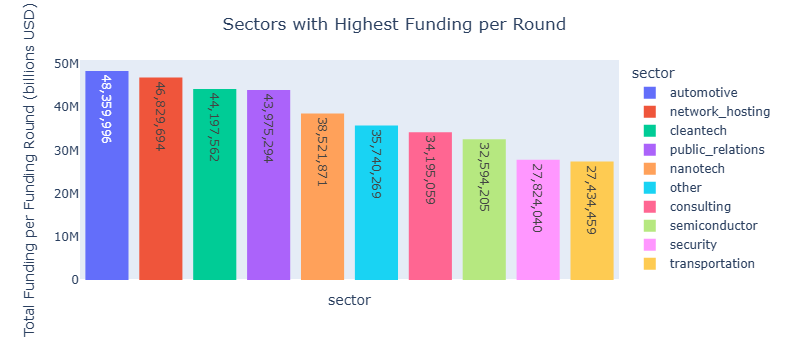

In [45]:

fig3= px.bar(
    by_sector_5,
    x="sector",
    y="funding_per_round",
    color= "sector",
    text="funding_per_round"
)

fig3.update_traces(
    texttemplate= "%{text:,.0f}",
    # textposition='outside',
    marker=dict(line=dict(width=0))
)

fig3.update_yaxes(showticklabels=True, showgrid=False,title= "Total Funding per Funding Round (billions USD)")
fig3.update_xaxes(showticklabels= False, showgrid= False, title="sector")
fig3.update_layout(
    title= 'Sectors with Highest Funding per Round ',
    title_x=0.5
)
fig3.show()

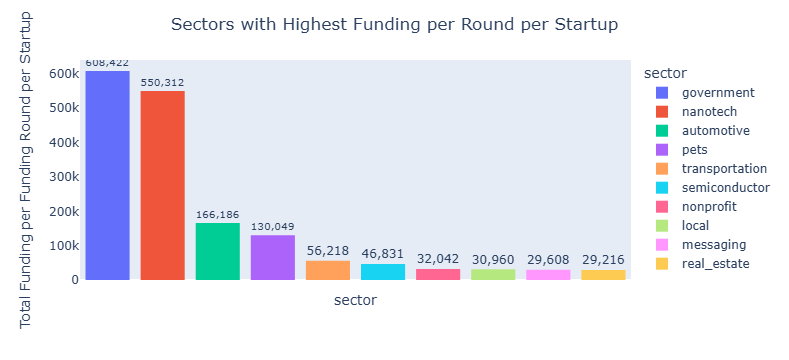

In [44]:

fig4= px.bar(
    by_startup_5,
    x="sector",
    y="funding_per_round_per_startup",
    color= "sector",
    text="funding_per_round_per_startup"
)

fig4.update_traces(
    texttemplate= "%{text:,.0f}",
    textposition='outside',
    marker=dict(line=dict(width=0))
)

fig4.update_yaxes(showticklabels=True, showgrid=False,title= "Total Funding per Funding Round per Startup")
fig4.update_xaxes(showticklabels= False, showgrid= False, title="sector")
fig4.update_layout(
    title= 'Sectors with Highest Funding per Round per Startup',
    title_x=0.5
)
fig4.show()

In [34]:
# defining the new column for indicating success and grouping by 'country' to get the mean

# grouping by country to get country metrics
country_metrics= cmp_df.groupby('country_code').agg(
    total_startups=('normalized_name','nunique'),
    total_funding=('funding_total_usd','sum'),
    avg_funding=('funding_total_usd','mean'),
    total_funding_rounds=('funding_rounds','sum')).reset_index()

# converting to a dataframe and getting the top 10 countries
# country_metrics_df=country_metrics.nlargest(10,'avg_funding')

country_metrics_df= pd.DataFrame(country_metrics)
country_metrics_df['funding_per_round']= (country_metrics_df['total_funding'])/(country_metrics_df['total_funding_rounds'])
country_metrics_df['funding_per_round_per_startup']= country_metrics_df['total_funding']/(country_metrics_df['total_funding_rounds']*country_metrics_df['total_startups'])
country_metrics_df['funding_per_round_per_startup']=country_metrics_df['funding_per_round_per_startup'].round(0)

not_null= country_metrics_df.query('funding_per_round != inf & funding_per_round != 0.0 & funding_per_round_per_startup!= inf & funding_per_round_per_startup!= 0.0')
country_metrics_df= not_null.sort_values(by='funding_per_round', ascending= False)
country_metrics_df= country_metrics_df.nlargest(10, 'funding_per_round' )

# getting the countries with the highest funding per round per startup

startup_metrics=not_null.copy()
startup_metrics=startup_metrics.sort_values(by='funding_per_round_per_startup', ascending=False)
startup_metrics=startup_metrics.nlargest(10,'funding_per_round_per_startup')

startup_metrics

,country_code,total_startups,total_funding,avg_funding,total_funding_rounds,funding_per_round,funding_per_round_per_startup
24,BMU,7,756966500.0,1.261611e+08,5.0,151393300.0,21627614.0
150,SWZ,8,69267148.0,8.658394e+06,2.0,34633574.0,4329197.0
144,SMR,2,5769800.0,2.884900e+06,1.0,5769800.0,2884900.0
132,PST,7,19227210.0,2.746744e+06,1.0,19227210.0,2746744.0
174,ZMB,2,5286600.0,2.643300e+06,1.0,5286600.0,2643300.0
66,HMI,1,2573200.0,2.573200e+06,1.0,2573200.0,2573200.0
89,LAO,2,4750000.0,2.375000e+06,1.0,4750000.0,2375000.0
91,LIE,7,16018551.0,2.669758e+06,1.0,16018551.0,2288364.0
138,SAU,31,69877026.0,2.588038e+06,1.0,69877026.0,2254098.0
131,PRY,3,6660000.0,2.220000e+06,1.0,6660000.0,2220000.0


In [35]:
country_metrics_df

,country_code,total_startups,total_funding,avg_funding,total_funding_rounds,funding_per_round,funding_per_round_per_startup
24,BMU,7,7.569665e+08,1.261611e+08,5.0,1.513933e+08,21627614.0
138,SAU,31,6.987703e+07,2.588038e+06,1.0,6.987703e+07,2254098.0
38,CSS,52,1.250124e+08,2.451224e+06,2.0,6.250621e+07,1202043.0
122,PAK,144,3.077511e+08,2.246358e+06,7.0,4.396444e+07,305309.0
118,NPL,26,3.922712e+07,1.705527e+06,1.0,3.922712e+07,1508736.0
166,Unknown,108195,9.087824e+10,2.166192e+06,2444.0,3.718422e+07,344.0
105,MLT,25,1.061647e+08,4.246588e+06,3.0,3.538823e+07,1415529.0
150,SWZ,8,6.926715e+07,8.658394e+06,2.0,3.463357e+07,4329197.0
22,BLR,32,6.533941e+07,2.107723e+06,2.0,3.266970e+07,1020928.0
158,TWN,131,9.036134e+08,7.996579e+06,29.0,3.115908e+07,237856.0


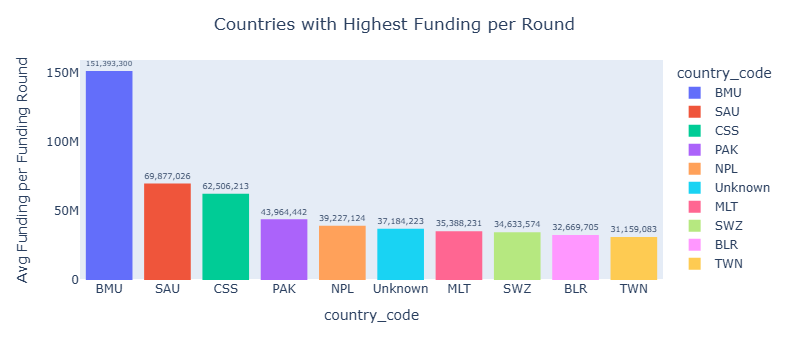

In [43]:
fig5= px.bar(
    country_metrics_df,
    x="country_code",
    y="funding_per_round",
    color= "country_code",
    text="funding_per_round"
)

fig5.update_traces(
    texttemplate= "%{text:,.0f}",
    textposition='outside',
    marker=dict(line=dict(width=0))
)

fig5.update_yaxes(showticklabels=True, showgrid=False,title= "Avg Funding per Funding Round")
fig5.update_xaxes(showticklabels= True, showgrid= False, title="country_code")
fig5.update_layout(
    title= 'Countries with Highest Funding per Round ',
    title_x=0.5
)
fig5.show()

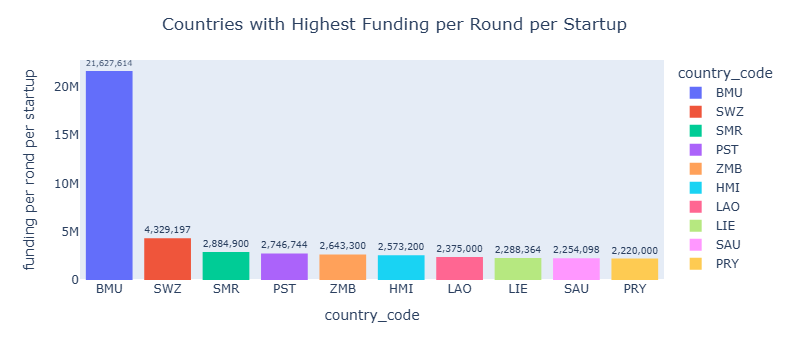

In [42]:
fig6= px.bar(
    startup_metrics,
    x="country_code",
    y="funding_per_round_per_startup",
    color= "country_code",
    text="funding_per_round_per_startup"
)

fig6.update_traces(
    texttemplate= "%{text:,.0f}",
    textposition='outside',
    marker=dict(line=dict(width=0))
)

fig6.update_yaxes(showticklabels=True, showgrid=False,title= "funding per rond per startup")
fig6.update_xaxes(showticklabels= True, showgrid= False, title="country_code")

fig6.update_layout(
    title= 'Countries with Highest Funding per Round per Startup',
    title_x=0.5
)
fig6.show()

In [56]:
app.layout= html.Div([
    html.H1("Company Funding Dashboard"),
    html.Div([
        dcc.Graph(figure=fig),
        dcc.Graph(figure=fig2),
        dcc.Graph(figure=fig3),
        dcc.Graph(figure=fig4),
        dcc.Graph(figure=fig5),
        dcc.Graph(figure=fig6)
    ]
            )
]
                    )

if __name__== "__main__":
    app.run()